In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
matches = pd.read_csv("./data/matches_dep_constr.tsv", sep="\t")
matches

,constr,fuzziness (common dep),fuzziness (matches),sentence
0,12,0.062500,0.857143,"Dieser hat allerdings weder die Möglichkeit , ..."
1,12,0.062500,0.857143,Das gestrige Ereignis hatte weder verletzte Pe...
2,15,0.066667,0.857143,Welch ein Image-Gewinn ...
3,15,0.066667,0.857143,"Welch Wunder , dass die Macher nicht noch ein ..."
4,15,0.066667,0.714286,"Welch schönes Gefühl ist es , in Bobotemp-Shor..."
...,...,...,...,...
353444,1986,0.176471,0.800000,"Da eine Bestätigung per E-Mail folgte , hatte ..."
353445,1986,0.176471,0.800000,Für die Konkurrenz der Deutschen Telekom wird ...
353446,1986,0.176471,0.850000,"Inlandsgespräche waren um 7,9 Prozent billiger..."
353447,1986,0.176471,0.800000,Ohne Hightech und neue Ideen hat auch das trad...


In [38]:
matches["m"] = matches.apply(lambda row: row["fuzziness (common dep)"] * row["fuzziness (matches)"], axis=1)
matches

,constr,fuzziness (common dep),fuzziness (matches),sentence,m
0,12,0.062500,0.857143,"Dieser hat allerdings weder die Möglichkeit , ...",0.053571
1,12,0.062500,0.857143,Das gestrige Ereignis hatte weder verletzte Pe...,0.053571
2,15,0.066667,0.857143,Welch ein Image-Gewinn ...,0.057143
3,15,0.066667,0.857143,"Welch Wunder , dass die Macher nicht noch ein ...",0.057143
4,15,0.066667,0.714286,"Welch schönes Gefühl ist es , in Bobotemp-Shor...",0.047619
...,...,...,...,...,...
353444,1986,0.176471,0.800000,"Da eine Bestätigung per E-Mail folgte , hatte ...",0.141176
353445,1986,0.176471,0.800000,Für die Konkurrenz der Deutschen Telekom wird ...,0.141176
353446,1986,0.176471,0.850000,"Inlandsgespräche waren um 7,9 Prozent billiger...",0.150000
353447,1986,0.176471,0.800000,Ohne Hightech und neue Ideen hat auch das trad...,0.141176


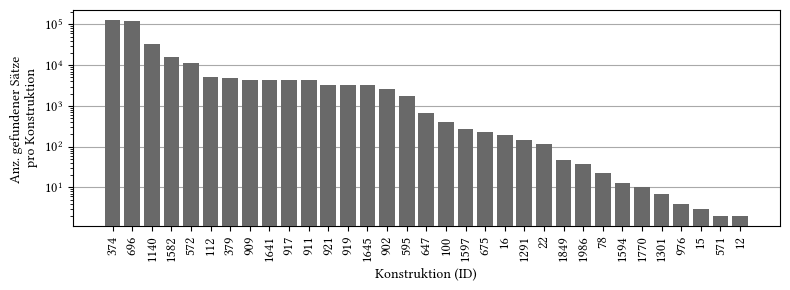

In [39]:
constr_counts = matches['constr'].value_counts()
constr_counts = constr_counts.sort_values(ascending=False)

constr_strings = [str(i) for i in list(constr_counts.index)]

plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(8, 3))

plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)
plt.bar(constr_strings, constr_counts.values, color='dimgrey', zorder=3)

plt.yscale('log')
plt.xlabel('Konstruktion (ID)')
plt.ylabel('Anz. gefundener Sätze \npro Konstruktion')

plt.xticks(rotation=90)

plt.tight_layout()

plt.savefig('matches_number.pdf')
plt.show()

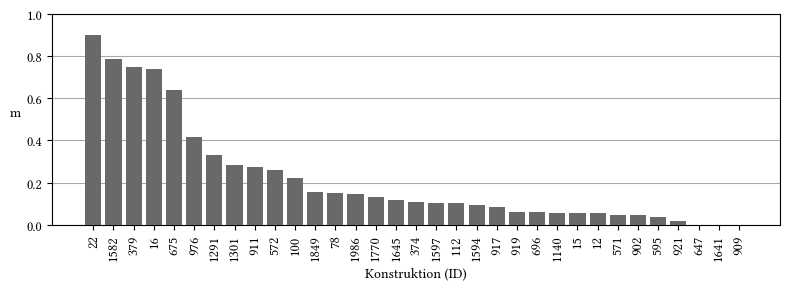

In [40]:
constr_avg_m = matches.groupby('constr')['m'].mean()
constr_avg_m = constr_avg_m.sort_values(ascending=False)
constr_strings = [str(i) for i in list(constr_avg_m.index)]

plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(8, 3))

plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)
plt.bar(constr_strings, constr_avg_m.values, color='dimgrey', zorder=3)

plt.ylim(0, 1)
plt.xlabel('Konstruktion (ID)')
plt.ylabel('m', rotation=0, ha="right")

plt.xticks(rotation=90)

plt.tight_layout()

plt.savefig('matches_m_value.pdf')
plt.show()